https://www.kaggle.com/ashydv/bank-customer-clustering-k-modes-clustering

In [47]:
def plot_combined(combinedDf1, combinedDf2):
    f, axs = plt.subplots(1,2,figsize = (15,5))

    a = sns.countplot(x=combinedDf1['D_PopolazioneStudenti_1'],hue=combinedDf1['cluster_predicted'], ax=axs[0])
    b = sns.countplot(x=combinedDf2['D_PopolazioneStudenti_1'],hue=combinedDf2['cluster_predicted'], ax=axs[1])

    a.set_xticklabels(a.get_xticklabels(), rotation=90)
    b.set_xticklabels(b.get_xticklabels(), rotation=90)

    plt.show()
    f.savefig('plot_pop_studenti.png')

    
    f, axs = plt.subplots(2,2,figsize = (15,15))

    a=sns.countplot(x=combinedDf1['R_AreeDisciplinari'],hue=combinedDf1['cluster_predicted'],ax=axs[0,0])
    b=sns.countplot(x=combinedDf1['D_genere'],hue=combinedDf1['cluster_predicted'],ax=axs[0,1])

    d=sns.countplot(x=combinedDf2['R_AreeDisciplinari'],hue=combinedDf2['cluster_predicted'],ax=axs[1,0])
    e=sns.countplot(x=combinedDf2['D_genere'],hue=combinedDf2['cluster_predicted'],ax=axs[1,1])


    a.set_xticklabels(a.get_xticklabels(), rotation=90)
    b.set_xticklabels(b.get_xticklabels(), rotation=90)

    e.set_xticklabels(d.get_xticklabels(), rotation=90)
    d.set_xticklabels(e.get_xticklabels(), rotation=90)


    plt.tight_layout()
    plt.show()
    f.savefig('plot_aree_genere.png')
    
    
    f, axs = plt.subplots(1,3,figsize = (15,5))
    a=sns.countplot(x=combinedDf1['D_Tipologia_Attivita'],hue=combinedDf1['cluster_predicted'],ax=axs[0])
    b=sns.countplot(x=combinedDf1['age_bin'],hue=combinedDf1['cluster_predicted'],ax=axs[1])
    c=sns.countplot(x=combinedDf1['D_PopolazioneStudenti_1'],hue=combinedDf1['cluster_predicted'])


    a.set_xticklabels(a.get_xticklabels(), rotation=90)
    b.set_xticklabels(b.get_xticklabels(), rotation=90)
    c.set_xticklabels(c.get_xticklabels(), rotation=90)

    plt.show()
    f.savefig('plot_att_pop_age1.png')
    
    f, axs = plt.subplots(1,3,figsize = (15,5))
    a=sns.countplot(x=combinedDf2['D_Tipologia_Attivita'],hue=combinedDf2['cluster_predicted'],ax=axs[0])
    b=sns.countplot(x=combinedDf2['age_bin'],hue=combinedDf2['cluster_predicted'],ax=axs[1])
    c=sns.countplot(x=combinedDf2['D_PopolazioneStudenti_1'],hue=combinedDf2['cluster_predicted'])


    a.set_xticklabels(a.get_xticklabels(), rotation=90)
    b.set_xticklabels(b.get_xticklabels(), rotation=90)
    c.set_xticklabels(c.get_xticklabels(), rotation=90)

    plt.show()
    f.savefig('plot_att_pop_age2.png')


In [3]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

style.use("ggplot")
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
%matplotlib inline
gruppo_1 = pd.read_pickle("./gruppo_1.pkl")
gruppo_2 = pd.read_pickle("./gruppo_2.pkl")
gruppo_1.drop(['D_PopolazioneStudenti_2', 'D_PopolazioneStudenti_3'], axis=1, inplace=True)
gruppo_2.drop(['D_PopolazioneStudenti_2', 'D_PopolazioneStudenti_3'], axis=1, inplace=True)

In [4]:
gruppo_1['age_bin'] = pd.cut(gruppo_1['D_eta'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
gruppo_1  = gruppo_1.drop('D_eta',axis = 1)
gruppo_2['age_bin'] = pd.cut(gruppo_2['D_eta'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
gruppo_2  = gruppo_2.drop('D_eta',axis = 1)

In [5]:
for col in gruppo_1.columns:
    gruppo_1[col] = gruppo_1[col].astype('category')
for col in gruppo_2.columns:
    gruppo_2[col] = gruppo_2[col].astype('category')

In [6]:
gruppo_1_copy = gruppo_1.copy()
gruppo_2_copy = gruppo_2.copy()

In [7]:
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
gruppo_1 = gruppo_1.apply(le1.fit_transform)
le2 = preprocessing.LabelEncoder()
gruppo_2 = gruppo_2.apply(le2.fit_transform)

In [11]:
gruppo_1 = gruppo_1_copy.reset_index()
gruppo_2 = gruppo_2_copy.reset_index()

## 2 cluster

In [13]:
from kmodes.kmodes import KModes
km_cao1 = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao1 = km_cao1.fit_predict(gruppo_1)
km_cao2 = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao2 = km_cao2.fit_predict(gruppo_2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 142, cost: 5458.0
Run 1, iteration: 2/100, moves: 69, cost: 5458.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9, cost: 826.0


In [14]:
clustersDf1 = pd.DataFrame(fitClusters_cao1)
clustersDf1.columns = ['cluster_predicted']
combinedDf1 = pd.concat([gruppo_1, clustersDf1], axis = 1).reset_index()
combinedDf1 = combinedDf1.drop(['index', 'level_0'], axis = 1)
clustersDf2 = pd.DataFrame(fitClusters_cao2)
clustersDf2.columns = ['cluster_predicted']
combinedDf2 = pd.concat([gruppo_2, clustersDf2], axis = 1).reset_index()
combinedDf2 = combinedDf2.drop(['index', 'level_0'], axis = 1)

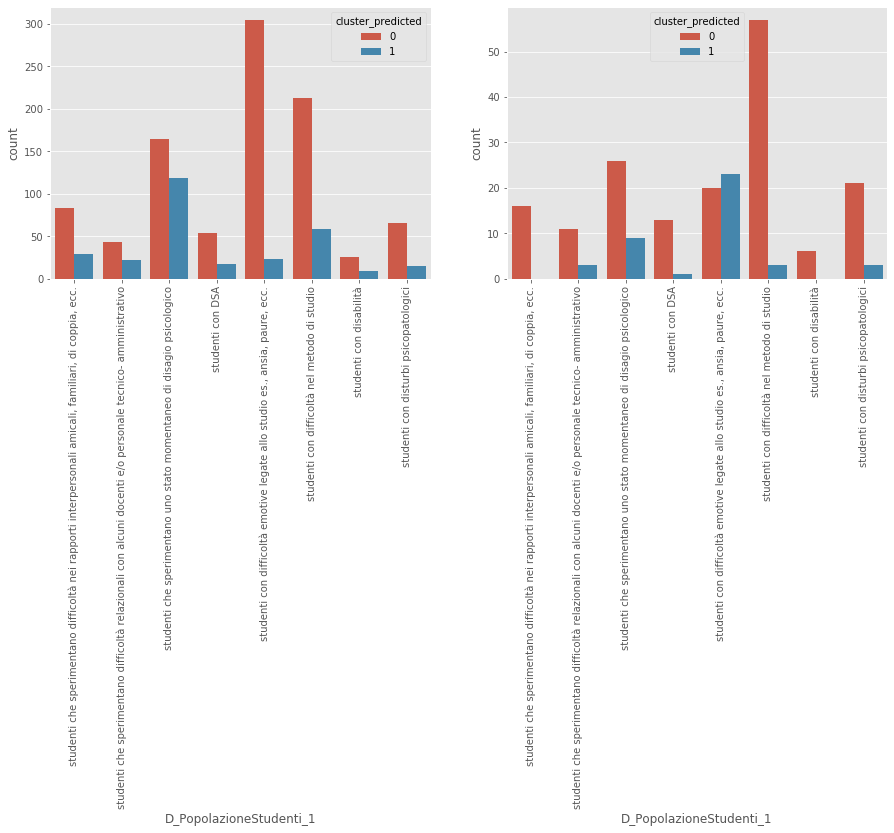

In [22]:
f, axs = plt.subplots(1,2,figsize = (15,5))

a = sns.countplot(x=combinedDf1['D_PopolazioneStudenti_1'],hue=combinedDf1['cluster_predicted'], ax=axs[0])
b = sns.countplot(x=combinedDf2['D_PopolazioneStudenti_1'],hue=combinedDf2['cluster_predicted'], ax=axs[1])

a.set_xticklabels(a.get_xticklabels(), rotation=90)
b.set_xticklabels(b.get_xticklabels(), rotation=90)

plt.show()

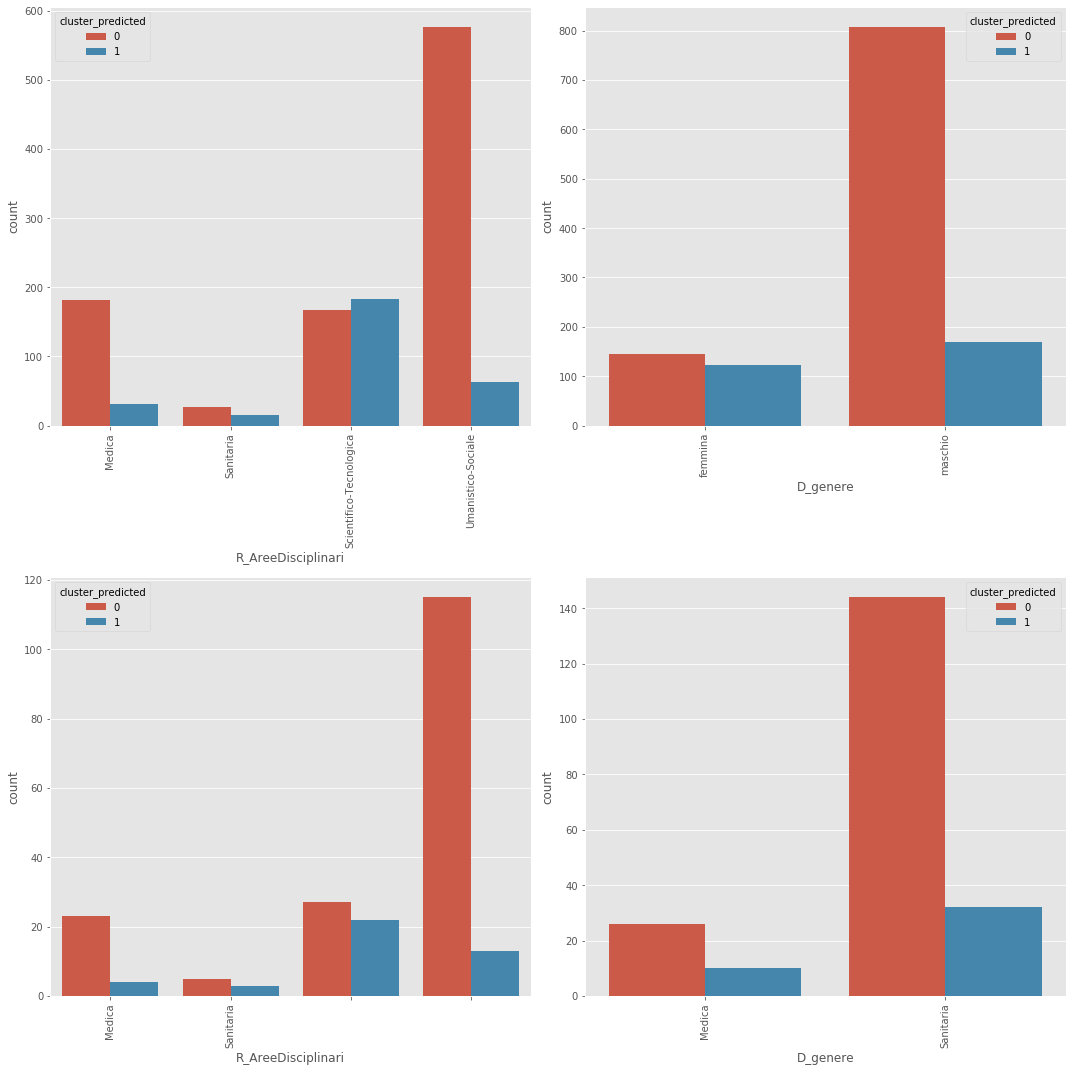

In [32]:
f, axs = plt.subplots(2,2,figsize = (15,15))

a=sns.countplot(x=combinedDf1['R_AreeDisciplinari'],hue=combinedDf1['cluster_predicted'],ax=axs[0,0])
b=sns.countplot(x=combinedDf1['D_genere'],hue=combinedDf1['cluster_predicted'],ax=axs[0,1])

d=sns.countplot(x=combinedDf2['R_AreeDisciplinari'],hue=combinedDf2['cluster_predicted'],ax=axs[1,0])
e=sns.countplot(x=combinedDf2['D_genere'],hue=combinedDf2['cluster_predicted'],ax=axs[1,1])


a.set_xticklabels(a.get_xticklabels(), rotation=90)
b.set_xticklabels(b.get_xticklabels(), rotation=90)

e.set_xticklabels(d.get_xticklabels(), rotation=90)
d.set_xticklabels(e.get_xticklabels(), rotation=90)


plt.tight_layout()
plt.show()


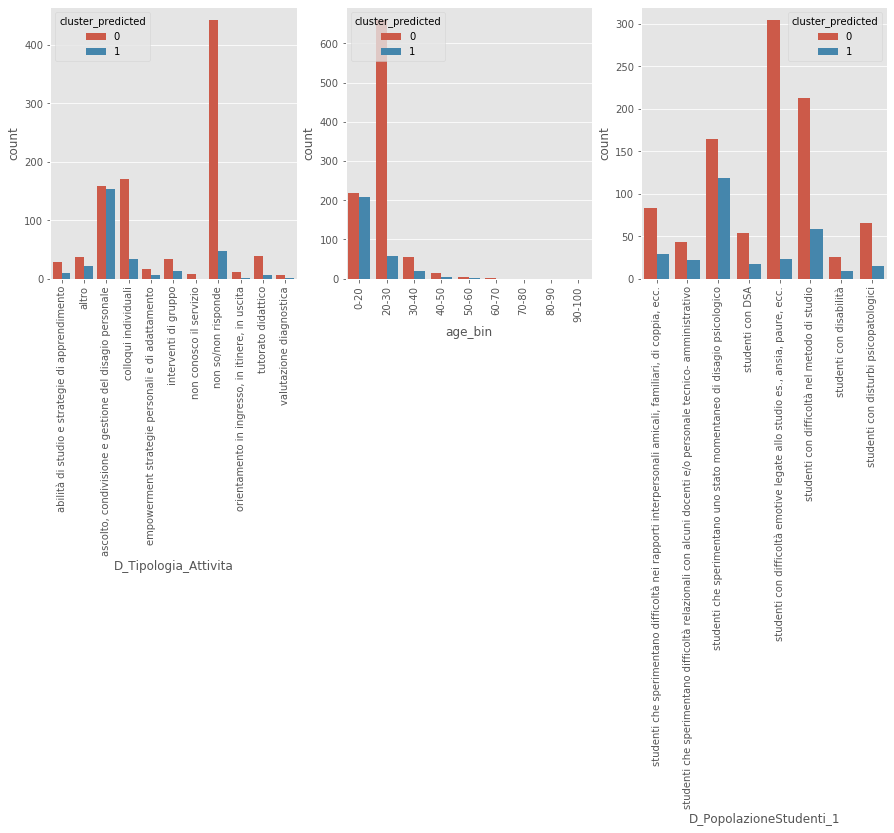

In [33]:
f, axs = plt.subplots(1,3,figsize = (15,5))
a=sns.countplot(x=combinedDf1['D_Tipologia_Attivita'],hue=combinedDf1['cluster_predicted'],ax=axs[0])
b=sns.countplot(x=combinedDf1['age_bin'],hue=combinedDf1['cluster_predicted'],ax=axs[1])
c=sns.countplot(x=combinedDf1['D_PopolazioneStudenti_1'],hue=combinedDf1['cluster_predicted'])


a.set_xticklabels(a.get_xticklabels(), rotation=90)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
c.set_xticklabels(c.get_xticklabels(), rotation=90)

plt.show()

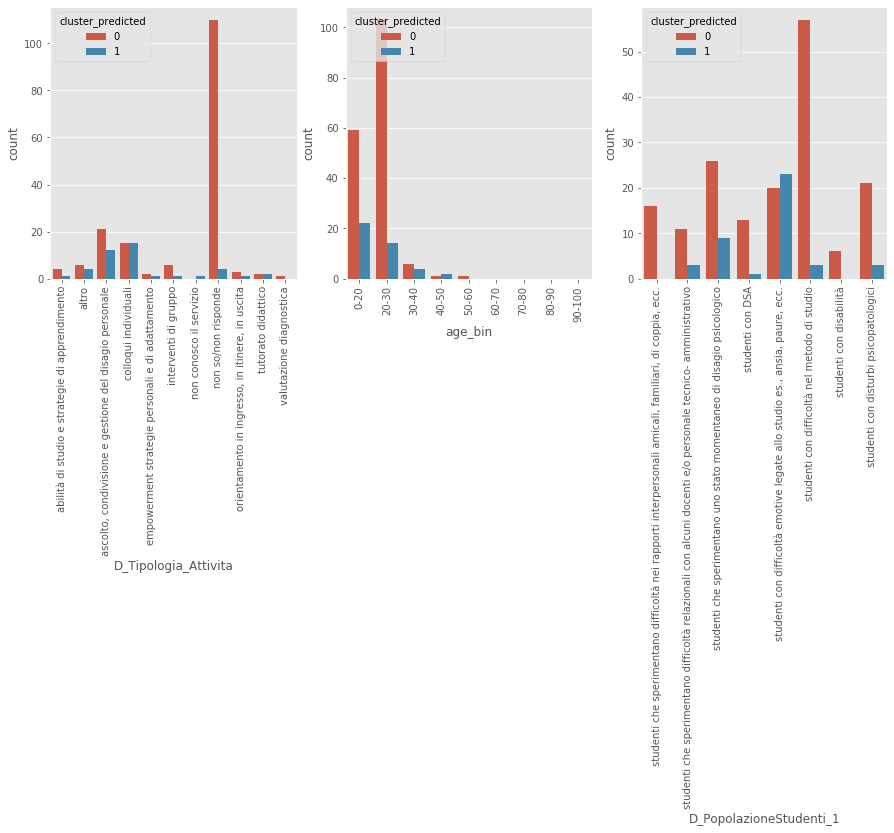

In [34]:
f, axs = plt.subplots(1,3,figsize = (15,5))
a=sns.countplot(x=combinedDf2['D_Tipologia_Attivita'],hue=combinedDf2['cluster_predicted'],ax=axs[0])
b=sns.countplot(x=combinedDf2['age_bin'],hue=combinedDf2['cluster_predicted'],ax=axs[1])
c=sns.countplot(x=combinedDf2['D_PopolazioneStudenti_1'],hue=combinedDf2['cluster_predicted'])


a.set_xticklabels(a.get_xticklabels(), rotation=90)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
c.set_xticklabels(c.get_xticklabels(), rotation=90)

plt.show()

---

## Same analysis 5 clusters

In [35]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

style.use("ggplot")
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
%matplotlib inline
gruppo_1 = pd.read_pickle("./gruppo_1.pkl")
gruppo_2 = pd.read_pickle("./gruppo_2.pkl")
gruppo_1.drop(['D_PopolazioneStudenti_2', 'D_PopolazioneStudenti_3'], axis=1, inplace=True)
gruppo_2.drop(['D_PopolazioneStudenti_2', 'D_PopolazioneStudenti_3'], axis=1, inplace=True)
gruppo_1['age_bin'] = pd.cut(gruppo_1['D_eta'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
gruppo_1  = gruppo_1.drop('D_eta',axis = 1)
gruppo_2['age_bin'] = pd.cut(gruppo_2['D_eta'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
gruppo_2  = gruppo_2.drop('D_eta',axis = 1)
for col in gruppo_1.columns:
    gruppo_1[col] = gruppo_1[col].astype('category')
for col in gruppo_2.columns:
    gruppo_2[col] = gruppo_2[col].astype('category')

gruppo_1_copy = gruppo_1.copy()
gruppo_2_copy = gruppo_2.copy()

from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
gruppo_1 = gruppo_1.apply(le1.fit_transform)
le2 = preprocessing.LabelEncoder()
gruppo_2 = gruppo_2.apply(le2.fit_transform)

gruppo_1 = gruppo_1_copy.reset_index()
gruppo_2 = gruppo_2_copy.reset_index()


In [36]:
from kmodes.kmodes import KModes
km_cao1 = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao1 = km_cao1.fit_predict(gruppo_1)
km_cao2 = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao2 = km_cao2.fit_predict(gruppo_2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 192, cost: 4456.0
Run 1, iteration: 2/100, moves: 151, cost: 4455.0
Run 1, iteration: 3/100, moves: 0, cost: 4455.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 47, cost: 688.0
Run 1, iteration: 2/100, moves: 3, cost: 687.0
Run 1, iteration: 3/100, moves: 0, cost: 687.0


In [37]:
clustersDf1 = pd.DataFrame(fitClusters_cao1)
clustersDf1.columns = ['cluster_predicted']
combinedDf1 = pd.concat([gruppo_1, clustersDf1], axis = 1).reset_index()
combinedDf1 = combinedDf1.drop(['index', 'level_0'], axis = 1)
clustersDf2 = pd.DataFrame(fitClusters_cao2)
clustersDf2.columns = ['cluster_predicted']
combinedDf2 = pd.concat([gruppo_2, clustersDf2], axis = 1).reset_index()
combinedDf2 = combinedDf2.drop(['index', 'level_0'], axis = 1)

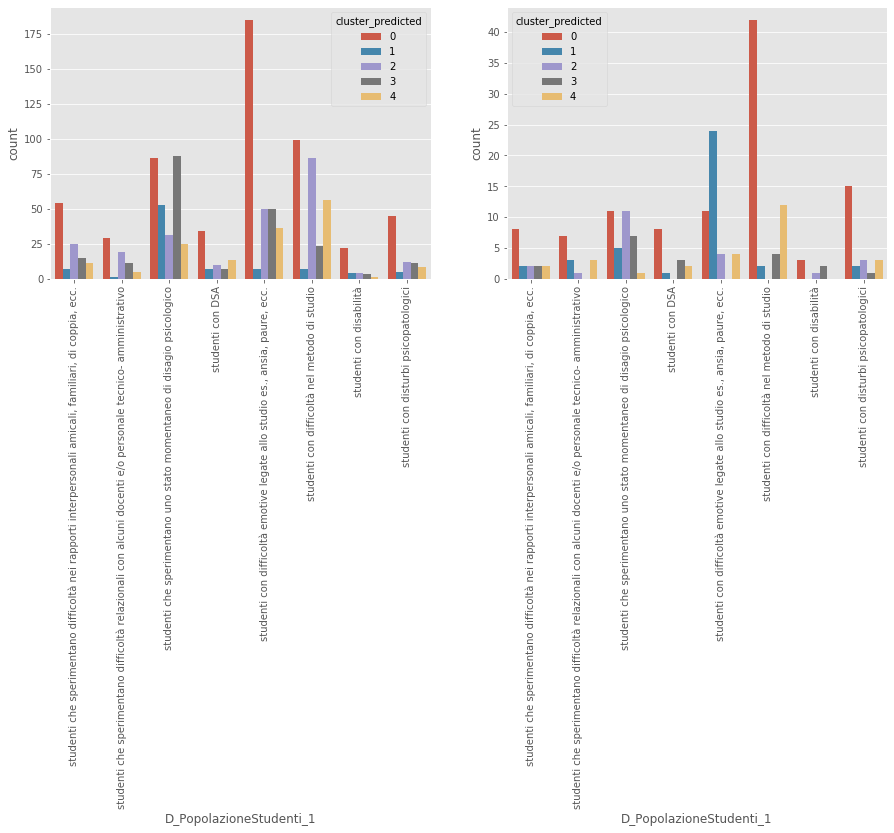

In [38]:
f, axs = plt.subplots(1,2,figsize = (15,5))

a = sns.countplot(x=combinedDf1['D_PopolazioneStudenti_1'],hue=combinedDf1['cluster_predicted'], ax=axs[0])
b = sns.countplot(x=combinedDf2['D_PopolazioneStudenti_1'],hue=combinedDf2['cluster_predicted'], ax=axs[1])

a.set_xticklabels(a.get_xticklabels(), rotation=90)
b.set_xticklabels(b.get_xticklabels(), rotation=90)

plt.show()

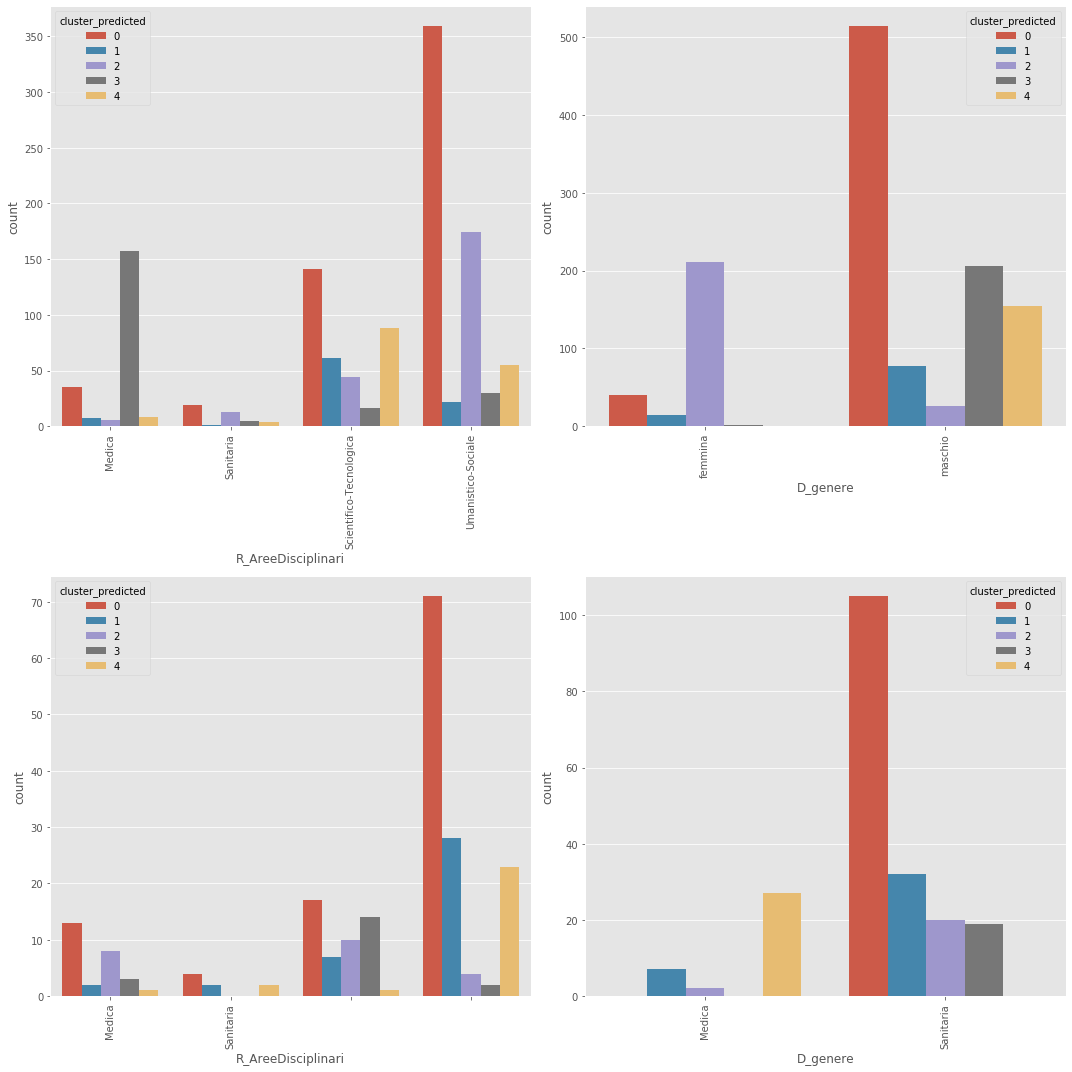

In [39]:
f, axs = plt.subplots(2,2,figsize = (15,15))

a=sns.countplot(x=combinedDf1['R_AreeDisciplinari'],hue=combinedDf1['cluster_predicted'],ax=axs[0,0])
b=sns.countplot(x=combinedDf1['D_genere'],hue=combinedDf1['cluster_predicted'],ax=axs[0,1])

d=sns.countplot(x=combinedDf2['R_AreeDisciplinari'],hue=combinedDf2['cluster_predicted'],ax=axs[1,0])
e=sns.countplot(x=combinedDf2['D_genere'],hue=combinedDf2['cluster_predicted'],ax=axs[1,1])


a.set_xticklabels(a.get_xticklabels(), rotation=90)
b.set_xticklabels(b.get_xticklabels(), rotation=90)

e.set_xticklabels(d.get_xticklabels(), rotation=90)
d.set_xticklabels(e.get_xticklabels(), rotation=90)


plt.tight_layout()
plt.show()


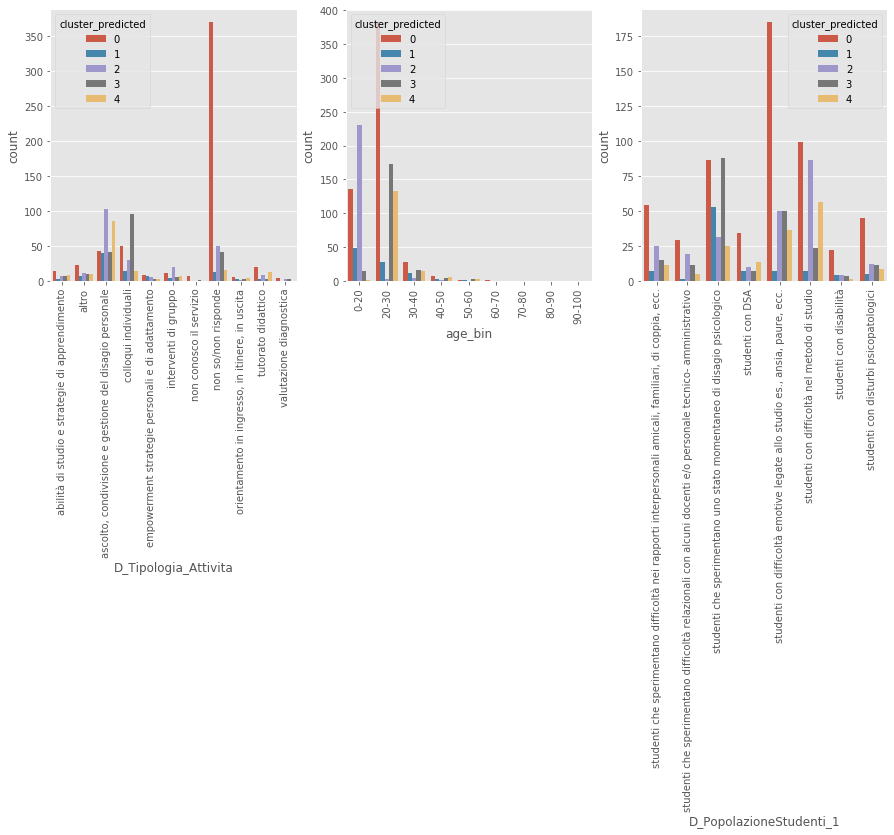

In [40]:
f, axs = plt.subplots(1,3,figsize = (15,5))
a=sns.countplot(x=combinedDf1['D_Tipologia_Attivita'],hue=combinedDf1['cluster_predicted'],ax=axs[0])
b=sns.countplot(x=combinedDf1['age_bin'],hue=combinedDf1['cluster_predicted'],ax=axs[1])
c=sns.countplot(x=combinedDf1['D_PopolazioneStudenti_1'],hue=combinedDf1['cluster_predicted'])


a.set_xticklabels(a.get_xticklabels(), rotation=90)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
c.set_xticklabels(c.get_xticklabels(), rotation=90)

plt.show()

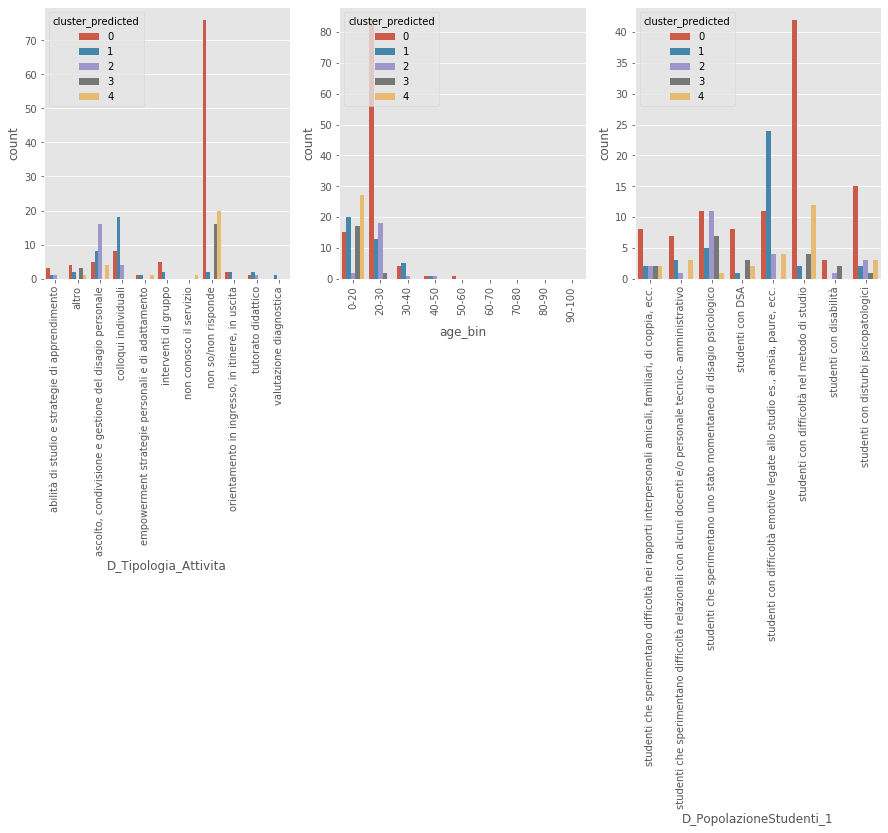

In [41]:
f, axs = plt.subplots(1,3,figsize = (15,5))
a=sns.countplot(x=combinedDf2['D_Tipologia_Attivita'],hue=combinedDf2['cluster_predicted'],ax=axs[0])
b=sns.countplot(x=combinedDf2['age_bin'],hue=combinedDf2['cluster_predicted'],ax=axs[1])
c=sns.countplot(x=combinedDf2['D_PopolazioneStudenti_1'],hue=combinedDf2['cluster_predicted'])


a.set_xticklabels(a.get_xticklabels(), rotation=90)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
c.set_xticklabels(c.get_xticklabels(), rotation=90)

plt.show()

----

## change age bin - 5 cluster

In [43]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

style.use("ggplot")
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
%matplotlib inline
gruppo_1 = pd.read_pickle("./gruppo_1.pkl")
gruppo_2 = pd.read_pickle("./gruppo_2.pkl")
gruppo_1.drop(['D_PopolazioneStudenti_2', 'D_PopolazioneStudenti_3'], axis=1, inplace=True)
gruppo_2.drop(['D_PopolazioneStudenti_2', 'D_PopolazioneStudenti_3'], axis=1, inplace=True)
gruppo_1['age_bin'] = pd.cut(gruppo_1['D_eta'], [0, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100], 
                              labels=['0-15', '15-20', '20-25', '25-30','30-35', '35-40','40-45', '45-50','50-60','60-70','70-80', '80-90','90-100'])
gruppo_1  = gruppo_1.drop('D_eta',axis = 1)
gruppo_2['age_bin'] = pd.cut(gruppo_2['D_eta'], [0, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100], 
                              labels=['0-15', '15-20', '20-25', '25-30','30-35', '35-40','40-45', '45-50','50-60','60-70','70-80', '80-90','90-100'])
gruppo_2  = gruppo_2.drop('D_eta',axis = 1)
for col in gruppo_1.columns:
    gruppo_1[col] = gruppo_1[col].astype('category')
for col in gruppo_2.columns:
    gruppo_2[col] = gruppo_2[col].astype('category')

gruppo_1_copy = gruppo_1.copy()
gruppo_2_copy = gruppo_2.copy()

from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
gruppo_1 = gruppo_1.apply(le1.fit_transform)
le2 = preprocessing.LabelEncoder()
gruppo_2 = gruppo_2.apply(le2.fit_transform)

gruppo_1 = gruppo_1_copy.reset_index()
gruppo_2 = gruppo_2_copy.reset_index()
from kmodes.kmodes import KModes
km_cao1 = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao1 = km_cao1.fit_predict(gruppo_1)
km_cao2 = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao2 = km_cao2.fit_predict(gruppo_2)
clustersDf1 = pd.DataFrame(fitClusters_cao1)
clustersDf1.columns = ['cluster_predicted']
combinedDf1 = pd.concat([gruppo_1, clustersDf1], axis = 1).reset_index()
combinedDf1 = combinedDf1.drop(['index', 'level_0'], axis = 1)
clustersDf2 = pd.DataFrame(fitClusters_cao2)
clustersDf2.columns = ['cluster_predicted']
combinedDf2 = pd.concat([gruppo_2, clustersDf2], axis = 1).reset_index()
combinedDf2 = combinedDf2.drop(['index', 'level_0'], axis = 1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 160, cost: 4785.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 27, cost: 731.0
Run 1, iteration: 2/100, moves: 15, cost: 719.0
Run 1, iteration: 3/100, moves: 10, cost: 719.0


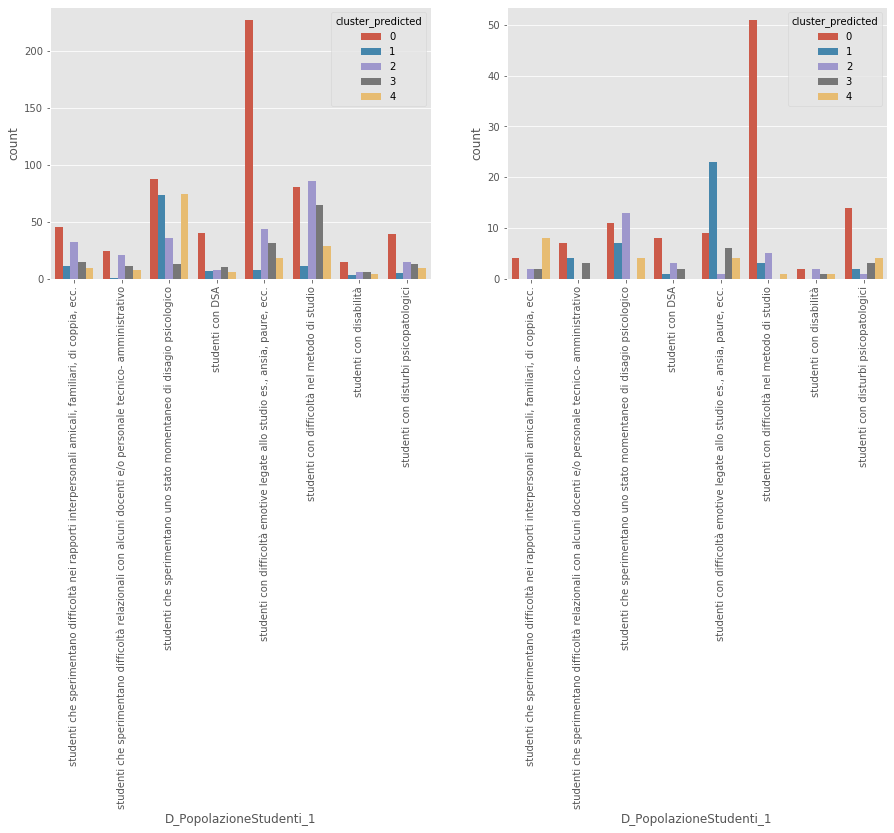

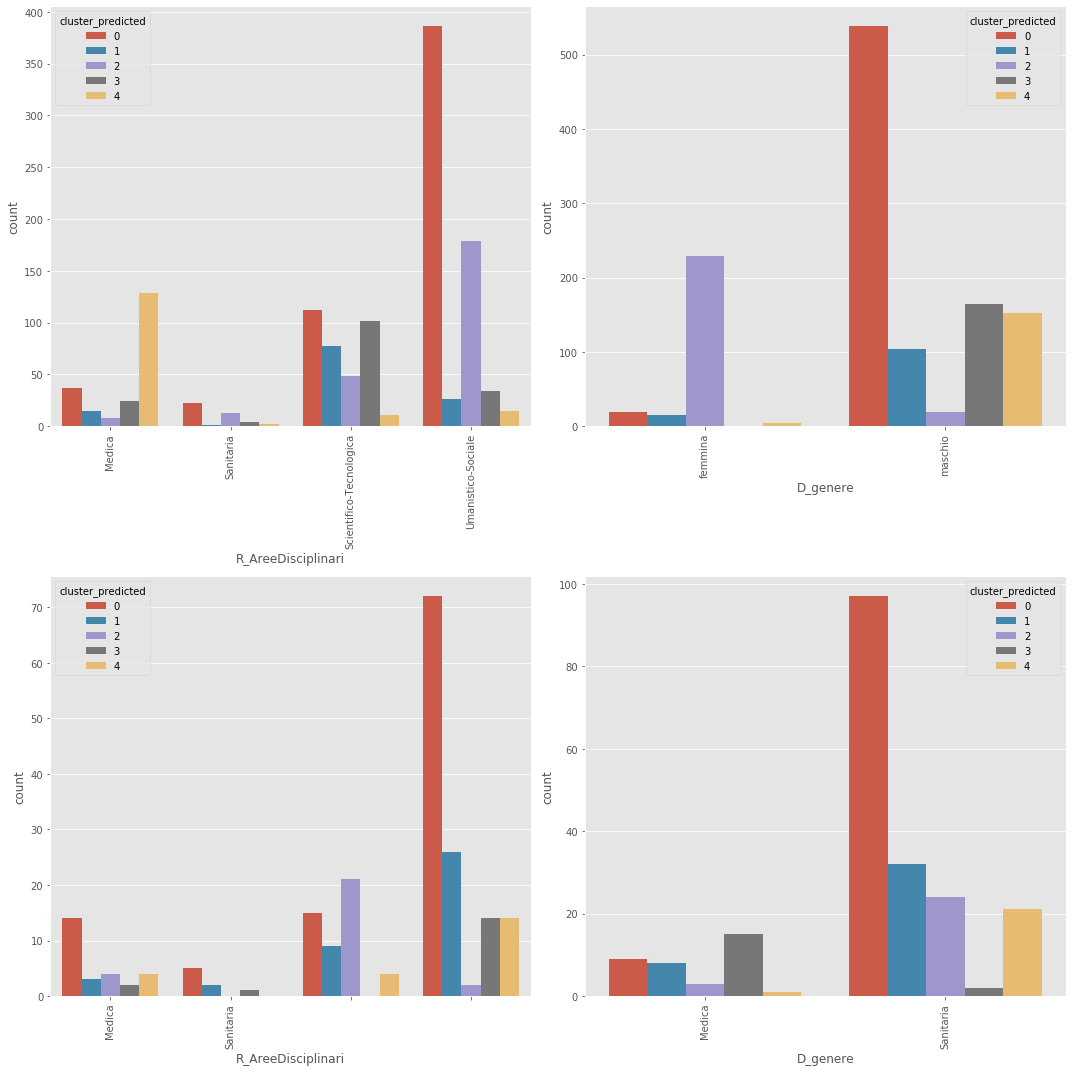

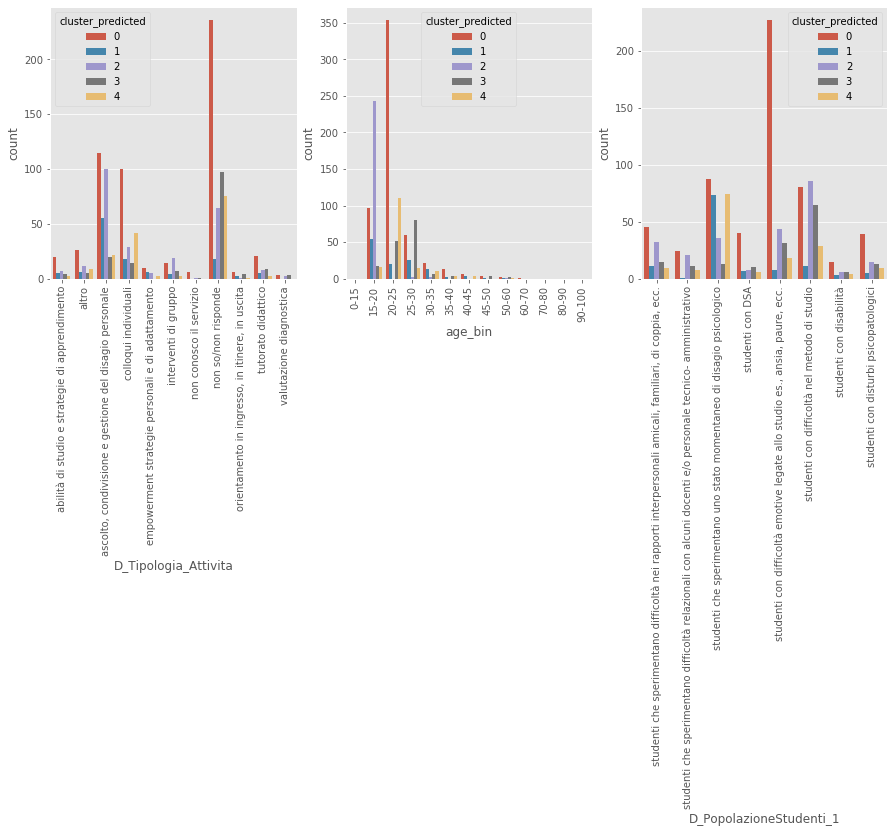

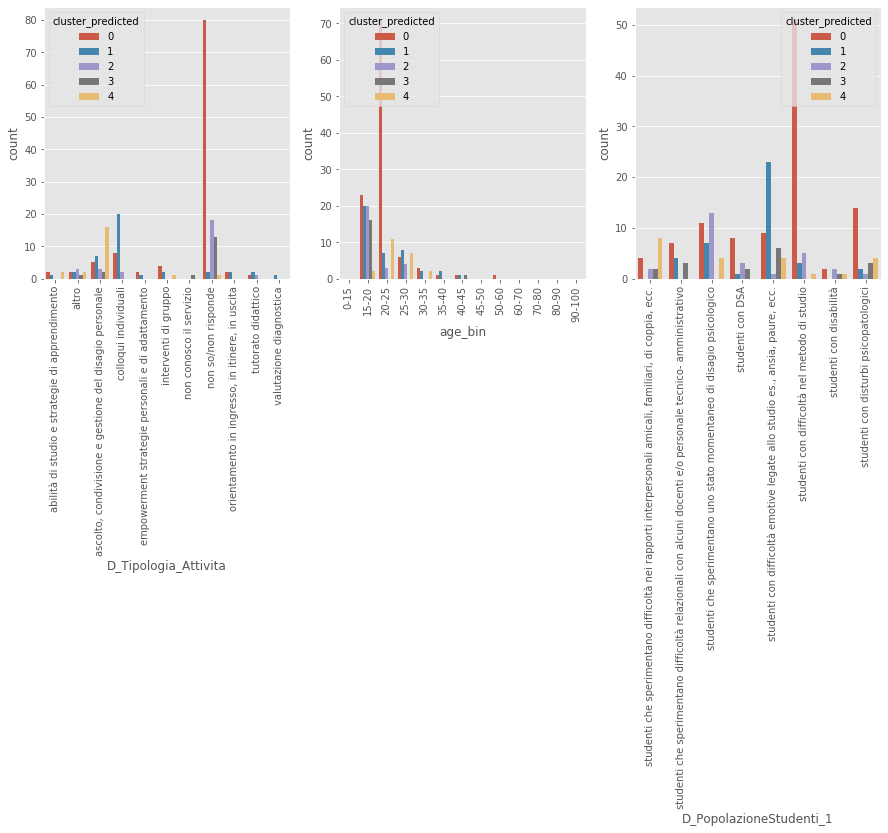

In [48]:
plot_combined(combinedDf1, combinedDf2)

---

### MCA Multiple Correspondence Analysis